# Горохов, ПМИ 433

## Исследовательский анализ данных

### Первые графики и выводы

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

#### Сводные таблицы

In [2]:
data = pd.read_csv('./visits.csv', sep='\t')
print(data.head())

         date_time        id  time_spent     name
0  20180406T165358  76144fb2        98.0  Василёк
1  20180404T173913  76144fb2        15.0  Василёк
2  20180403T172824  76144fb2       220.0  Василёк
3  20180407T070441  76144fb2        19.0  Василёк
4  20180404T132049  76144fb2        14.0  Василёк


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317104 entries, 0 to 317103
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date_time   317104 non-null  object 
 1   id          317104 non-null  object 
 2   time_spent  317104 non-null  float64
 3   name        317104 non-null  object 
dtypes: float64(1), object(3)
memory usage: 9.7+ MB


##### №1

In [4]:
name_stat = data.pivot_table(index='name', values='time_spent')
print(name_stat)

             time_spent
name                   
Агератум     337.802721
Амарант      132.760012
Аммобиум     256.708042
Арктотис      73.879984
Астильба     376.143149
Бальзамин    134.508411
Бархатцы     145.300328
Бегония      163.200647
Белоцветник  100.818966
Василёк      268.849897
Вербена      190.016594
Вероника     220.019402
Гацания      160.685185
Гвоздика     294.317308
Гейхера      167.445947
Гелихризум   290.138643
Георгина     166.615555
Годеция      113.958333
Диморфотека  406.161017
Доротеантус  263.568916
Ирис         179.931159
Календула    207.357323
Колокольчик  119.131564
Космос       164.867797
Крокус       349.031746
Лаватера     249.992844
Левкой       187.465606
Лобулярия     96.834350
Люпин        235.440937
Малопа        76.070543
Мальва       136.562234
Нарцисс       68.166758
Настурция    154.859694
Незабудка    120.362398
Немезия      186.535207
Обриета      141.777778
Петуния      265.780822
Пион         222.565523
Подснежник   180.286207
Роза         260

#### Базовая проверка данных

##### №2.1

In [5]:
total_visits = len(data)
print('Количество заездов: ' + str(total_visits))

Количество заездов: 317104


##### №2.2

In [6]:
total_stations = data['id'].nunique()
print('Количество АЗС: ' + str(total_stations))

Количество АЗС: 471


##### №2.3

In [7]:
print(pd.to_datetime(min(data['date_time'])),
      pd.to_datetime(max(data['date_time'])), sep=' ')

2018-04-02 00:00:08 2018-04-08 23:59:57


##### №2.4

In [8]:
total_days = (pd.to_datetime(max(data['date_time'])).ceil('1H')
              - pd.to_datetime(min(data['date_time'])).floor('1H')).days

In [9]:
station_visits_per_day = total_visits / total_stations / total_days
print('Количество заездов на АЗС в сутки: ' + str(station_visits_per_day))

Количество заездов на АЗС в сутки: 96.17955717318775


##### №2.5

In [10]:
print(data['name'].value_counts().sort_values(ascending=False).head(10))

Календула      85648
Василёк        79006
Георгина       34356
Немезия        20138
Колокольчик    18835
Мальва         17386
Гейхера        14125
Доротеантус     6312
Нарцисс         3640
Амарант         3221
Name: name, dtype: int64


#### Гистограмма

##### №3.1

array([[<AxesSubplot:title={'center':'time_spent'}>]], dtype=object)

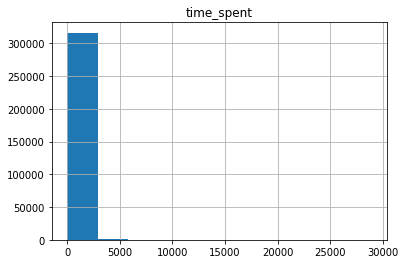

In [11]:
data.hist('time_spent')

##### №3.2

array([[<AxesSubplot:title={'center':'time_spent'}>]], dtype=object)

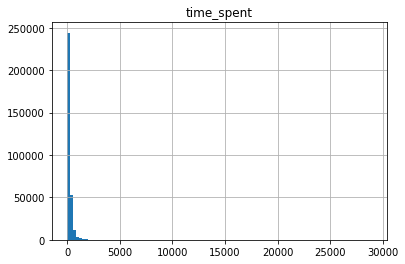

In [12]:
data.hist('time_spent', bins=100)

##### №3.3

array([[<AxesSubplot:title={'center':'time_spent'}>]], dtype=object)

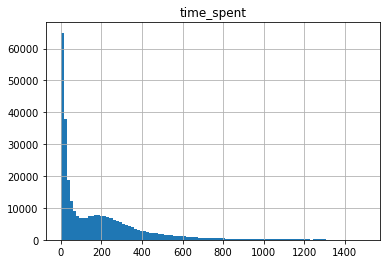

In [13]:
data.hist('time_spent', bins=100, range=(0, 1500))

#### Гистограмма для двух кубиков

##### №4.1

In [14]:
import random as rnd

In [15]:
def coin_flip():
    score = rnd.randint(0, 1)
    return score


def flips_heads(repeat):
    total = 0
    for i in range(repeat):
        flip = coin_flip()
        total += flip
    return total

In [16]:
experiments = []
for i in range(1000):
    score = flips_heads(10)
    experiments.append(score)
df_experiments = pd.DataFrame(experiments)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

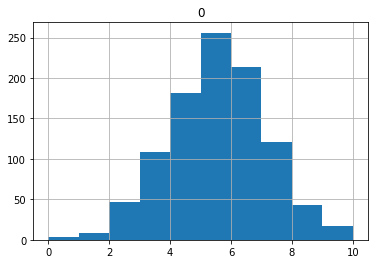

In [17]:
df_experiments.hist(range=(0, 10))

##### №4.2

In [18]:
def bus_wait_time():
    return rnd.randint(0, 10)


def train_wait_time():
    return rnd.randint(0, 5)


def total_delay():
    return (
        bus_wait_time()
        + train_wait_time()
        + train_wait_time()
        + bus_wait_time()
    )

In [19]:
days = []
for i in range(365 * 5):
    delay = total_delay()
    days.append(delay)
df_days = pd.DataFrame(days)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

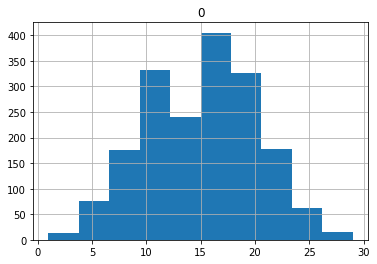

In [20]:
df_days.hist()

### Распределения

#### Диаграмма размаха

##### №5

(-100.0, 1000.0)

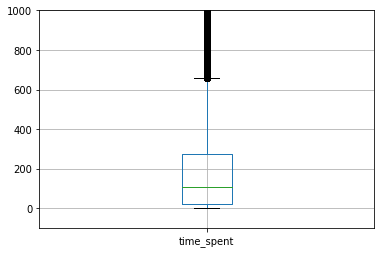

In [21]:
data.boxplot('time_spent')
plt.ylim(-100, 1000)

#### Описание данных

##### №6

In [22]:
data['time_spent'].describe()

count    317104.000000
mean        203.382294
std         395.754791
min           0.000000
25%          19.000000
50%         108.000000
75%         274.000000
max       28925.000000
Name: time_spent, dtype: float64

### Изучение срезов данных

#### Срезы данных и поиск авиабилетов

In [23]:
df = pd.DataFrame(
    {
        'From': [
            'Moscow',
            'Moscow',
            'St. Petersburg',
            'St. Petersburg',
            'St. Petersburg',
        ],
        'To': ['Rome', 'Rome', 'Rome', 'Barcelona', 'Barcelona'],
        'Is_Direct': [False, True, False, False, True],
        'Has_luggage': [True, False, False, True, False],
        'Price': [21032, 19250, 19301, 20168, 31425],
        'Date_From': [
            '01.07.19',
            '01.07.19',
            '04.07.2019',
            '03.07.2019',
            '05.07.2019',
        ],
        'Date_To': [
            '07.07.19',
            '07.07.19',
            '10.07.2019',
            '09.07.2019',
            '11.07.2019',
        ],
        'Airline': ['Belavia', 'S7', 'Finnair', 'Swiss', 'Rossiya'],
        'Travel_time_from': [995, 230, 605, 365, 255],
        'Travel_time_to': [350, 225, 720, 355, 250],
    }
)
print(df)

             From         To  Is_Direct  Has_luggage  Price   Date_From  \
0          Moscow       Rome      False         True  21032    01.07.19   
1          Moscow       Rome       True        False  19250    01.07.19   
2  St. Petersburg       Rome      False        False  19301  04.07.2019   
3  St. Petersburg  Barcelona      False         True  20168  03.07.2019   
4  St. Petersburg  Barcelona       True        False  31425  05.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
0    07.07.19  Belavia               995             350  
1    07.07.19       S7               230             225  
2  10.07.2019  Finnair               605             720  
3  09.07.2019    Swiss               365             355  
4  11.07.2019  Rossiya               255             250  


##### №7.1

In [24]:
print(df[df['Price'] * 1.5 < max(df['Price'])])

             From         To  Is_Direct  Has_luggage  Price   Date_From  \
1          Moscow       Rome       True        False  19250    01.07.19   
2  St. Petersburg       Rome      False        False  19301  04.07.2019   
3  St. Petersburg  Barcelona      False         True  20168  03.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
1    07.07.19       S7               230             225  
2  10.07.2019  Finnair               605             720  
3  09.07.2019    Swiss               365             355  


##### №7.2

In [25]:
print(df[(df['Travel_time_from'] >= 365) | (df['Travel_time_to'] < 250)])

             From         To  Is_Direct  Has_luggage  Price   Date_From  \
0          Moscow       Rome      False         True  21032    01.07.19   
1          Moscow       Rome       True        False  19250    01.07.19   
2  St. Petersburg       Rome      False        False  19301  04.07.2019   
3  St. Petersburg  Barcelona      False         True  20168  03.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
0    07.07.19  Belavia               995             350  
1    07.07.19       S7               230             225  
2  10.07.2019  Finnair               605             720  
3  09.07.2019    Swiss               365             355  


##### №7.3

In [26]:
print(df[~(df['Is_Direct']) & (df['Date_To'].isin(['01.07.19', '07.07.19']))])

     From    To  Is_Direct  Has_luggage  Price Date_From   Date_To  Airline  \
0  Moscow  Rome      False         True  21032  01.07.19  07.07.19  Belavia   

   Travel_time_from  Travel_time_to  
0               995             350  


#### Срезы данных методом query()

•	Поддерживают разные операции сравнения: !=, >, >=, <, <=.  
•	Проверяют, входят ли конкретные значения в список, конструкцией: <имя_столбца> in [список]. Если нужно узнать, нет ли в списке определённых значений, пишут так: <имя_столбца> not in [список].  
•	Работают с логическими операторами в привычном виде, где «или» — or , «и» — and, «не» — not. Указывать условия в скобках необязательно. Без скобок операции выполняются в следующем порядке: сначала not, потом and, затем or.  
•	В query() можно включать внешние переменные (не из датафрейма). При упоминании такой переменной необходимо помечать её знаком @.

##### №8.1

In [27]:
print(df.query('not Has_luggage and (Airline not in ["S7", "Rossiya"])'))

             From    To  Is_Direct  Has_luggage  Price   Date_From  \
2  St. Petersburg  Rome      False        False  19301  04.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
2  10.07.2019  Finnair               605             720  


##### №8.2

In [28]:
max_time = 300
print(df.query('Airline in ["S7", "Rossiya", "Belavia"] and Travel_time_from < @max_time'))

             From         To  Is_Direct  Has_luggage  Price   Date_From  \
1          Moscow       Rome       True        False  19250    01.07.19   
4  St. Petersburg  Barcelona       True        False  31425  05.07.2019   

      Date_To  Airline  Travel_time_from  Travel_time_to  
1    07.07.19       S7               230             225  
4  11.07.2019  Rossiya               255             250  


#### Срезы в действии

##### №9.1

In [29]:
print(data.sort_values('time_spent', ascending=False).head(10))

              date_time        id  time_spent      name
114797  20180402T055708  3c1e4c52     28925.0   Василёк
27147   20180406T080254  4b5f2af5     28519.0   Немезия
60547   20180408T000002  cf1ba8a5     28292.0   Василёк
19042   20180408T204208  5410e876     23696.0   Василёк
118597  20180408T165020  3c1e4c52     21184.0   Василёк
118058  20180402T111333  3c1e4c52     20359.0   Василёк
114406  20180408T083722  3c1e4c52     19886.0   Василёк
132164  20180405T160745  627ea5e3     19445.0    Левкой
281360  20180406T180459  d0c0928d     18614.0      Пион
165326  20180402T230204  3af3bb71     18569.0  Агератум


##### №9.2

In [30]:
sample = data.query('id == "3c1e4c52"')
# sample = data[data['id'] == '3c1e4c52']
print(len(sample))

5814


##### №9.3

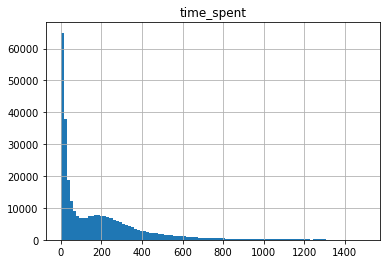

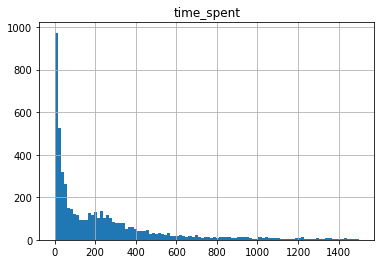

In [31]:
data.hist(range=(0, 1500), bins=100)
plt.show()
sample.hist(range=(0, 1500), bins=100)
plt.show() 

Распределение времени пребывания на станции 3c1e4c52 практически не отличается от распределения времени пребывания на всех АЗС. Станция 3c1e4c52 не является статистическим выбросом.

In [32]:
print(data.query('time_spent < 1000'))

              date_time        id  time_spent     name
0       20180406T165358  76144fb2        98.0  Василёк
1       20180404T173913  76144fb2        15.0  Василёк
2       20180403T172824  76144fb2       220.0  Василёк
3       20180407T070441  76144fb2        19.0  Василёк
4       20180404T132049  76144fb2        14.0  Василёк
...                 ...       ...         ...      ...
317099  20180408T053133  9cdb5039        11.0  Гейхера
317100  20180403T021353  9cdb5039       181.0  Гейхера
317101  20180408T062636  9cdb5039       252.0  Гейхера
317102  20180405T232425  9cdb5039        29.0  Гейхера
317103  20180405T194238  9cdb5039        20.0  Гейхера

[310907 rows x 4 columns]


##### №10.1

In [33]:
data['date_time'] = pd.to_datetime(data['date_time'], format='%Y%m%dT%H%M%S')
print(data.head())

            date_time        id  time_spent     name
0 2018-04-06 16:53:58  76144fb2        98.0  Василёк
1 2018-04-04 17:39:13  76144fb2        15.0  Василёк
2 2018-04-03 17:28:24  76144fb2       220.0  Василёк
3 2018-04-07 07:04:41  76144fb2        19.0  Василёк
4 2018-04-04 13:20:49  76144fb2        14.0  Василёк


##### №10.2

In [34]:
data['local_time'] = data['date_time'] + pd.Timedelta(hours=3)
print(data.head())

            date_time        id  time_spent     name          local_time
0 2018-04-06 16:53:58  76144fb2        98.0  Василёк 2018-04-06 19:53:58
1 2018-04-04 17:39:13  76144fb2        15.0  Василёк 2018-04-04 20:39:13
2 2018-04-03 17:28:24  76144fb2       220.0  Василёк 2018-04-03 20:28:24
3 2018-04-07 07:04:41  76144fb2        19.0  Василёк 2018-04-07 10:04:41
4 2018-04-04 13:20:49  76144fb2        14.0  Василёк 2018-04-04 16:20:49


##### №10.3

In [35]:
data['date_hour'] = data['local_time'].round('1H')
print(data.head())

            date_time        id  time_spent     name          local_time  \
0 2018-04-06 16:53:58  76144fb2        98.0  Василёк 2018-04-06 19:53:58   
1 2018-04-04 17:39:13  76144fb2        15.0  Василёк 2018-04-04 20:39:13   
2 2018-04-03 17:28:24  76144fb2       220.0  Василёк 2018-04-03 20:28:24   
3 2018-04-07 07:04:41  76144fb2        19.0  Василёк 2018-04-07 10:04:41   
4 2018-04-04 13:20:49  76144fb2        14.0  Василёк 2018-04-04 16:20:49   

            date_hour  
0 2018-04-06 20:00:00  
1 2018-04-04 21:00:00  
2 2018-04-03 20:00:00  
3 2018-04-07 10:00:00  
4 2018-04-04 16:00:00  


#### Графики

##### №11.1

<AxesSubplot:xlabel='local_time'>

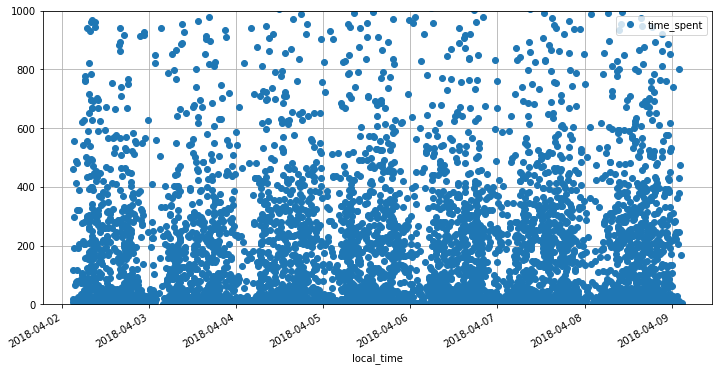

In [36]:
sample = data.query('id == "3c1e4c52"')

sample.plot(x='local_time', y='time_spent', ylim=(0, 1000), style='o', grid=True, figsize=(12, 6))

#### Группировка с pivot_table()

##### №12.1

<AxesSubplot:xlabel='date_hour'>

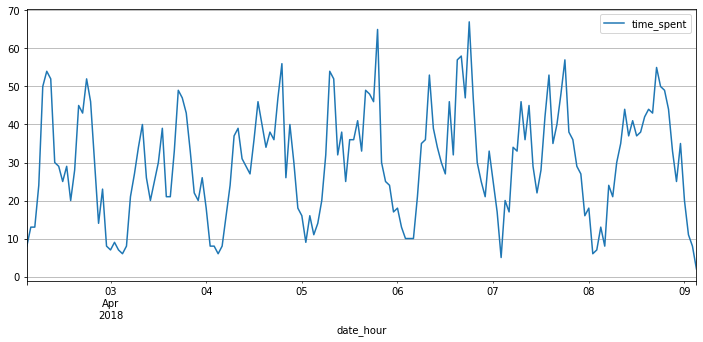

In [37]:
(data
     .query('id == "3c1e4c52" and time_spent < 1000')
     .pivot_table(index='date_hour', values='time_spent', aggfunc='count')
     .plot(grid=True, figsize=(12, 5))
)

#### Помечаем срез данных

##### №13.1

In [38]:
data['too_fast'] = (data['time_spent'] < 60)
print(data.head())

            date_time        id  time_spent     name          local_time  \
0 2018-04-06 16:53:58  76144fb2        98.0  Василёк 2018-04-06 19:53:58   
1 2018-04-04 17:39:13  76144fb2        15.0  Василёк 2018-04-04 20:39:13   
2 2018-04-03 17:28:24  76144fb2       220.0  Василёк 2018-04-03 20:28:24   
3 2018-04-07 07:04:41  76144fb2        19.0  Василёк 2018-04-07 10:04:41   
4 2018-04-04 13:20:49  76144fb2        14.0  Василёк 2018-04-04 16:20:49   

            date_hour  too_fast  
0 2018-04-06 20:00:00     False  
1 2018-04-04 21:00:00      True  
2 2018-04-03 20:00:00     False  
3 2018-04-07 10:00:00      True  
4 2018-04-04 16:00:00      True  


##### №13.2

In [39]:
print(data['too_fast'].mean())

0.42213910893586964


##### №13.3

In [40]:
too_fast_stat = data.pivot_table(index='id', values='too_fast')
print(too_fast_stat.head())

          too_fast
id                
00ca1b70  0.250000
011f7462  0.637489
015eaddd  0.726190
0178ce70  0.211538
018a83ef  0.510269


##### №13.4

array([[<AxesSubplot:title={'center':'too_fast'}>]], dtype=object)

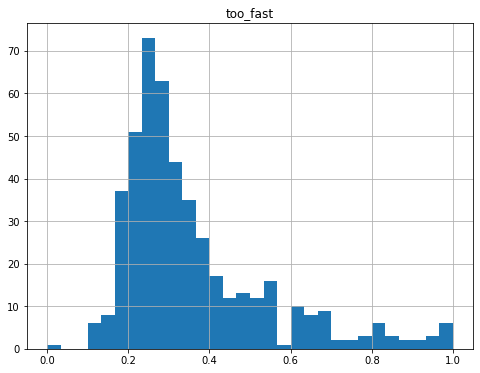

In [41]:
too_fast_stat.hist(bins=30, figsize=(8, 6))

##### №13.5

array([[<AxesSubplot:title={'center':'too_slow'}>]], dtype=object)

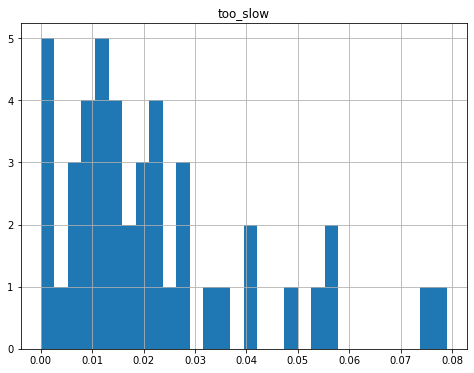

In [42]:
data['too_slow'] = (data['time_spent'] > 1000)

(data
     .pivot_table(index='name', values='too_slow')
     .hist(bins=30, figsize=(8, 6))
)

### Работа с несколькими источниками данных

#### Срезы по данным из внешнего словаря

##### №14.1

In [43]:
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')

In [44]:
print(good_ids)

          too_fast
id                
00ca1b70  0.250000
0178ce70  0.211538
01abf4e9  0.268293
030a9067  0.330435
03740f2d  0.261261
...            ...
fb6610be  0.265651
fbbd8cc2  0.239669
fc4b1b72  0.191136
fea1d1b8  0.326087
ff0f01d2  0.244094

[386 rows x 1 columns]


In [45]:
print(good_data)

                 date_time        id  time_spent     name          local_time  \
0      2018-04-06 16:53:58  76144fb2        98.0  Василёк 2018-04-06 19:53:58   
1      2018-04-04 17:39:13  76144fb2        15.0  Василёк 2018-04-04 20:39:13   
2      2018-04-03 17:28:24  76144fb2       220.0  Василёк 2018-04-03 20:28:24   
3      2018-04-07 07:04:41  76144fb2        19.0  Василёк 2018-04-07 10:04:41   
4      2018-04-04 13:20:49  76144fb2        14.0  Василёк 2018-04-04 16:20:49   
...                    ...       ...         ...      ...                 ...   
317099 2018-04-08 05:31:33  9cdb5039        11.0  Гейхера 2018-04-08 08:31:33   
317100 2018-04-03 02:13:53  9cdb5039       181.0  Гейхера 2018-04-03 05:13:53   
317101 2018-04-08 06:26:36  9cdb5039       252.0  Гейхера 2018-04-08 09:26:36   
317102 2018-04-05 23:24:25  9cdb5039        29.0  Гейхера 2018-04-06 02:24:25   
317103 2018-04-05 19:42:38  9cdb5039        20.0  Гейхера 2018-04-05 22:42:38   

                 date_hour 

##### №14.2

In [46]:
good_data = good_data.query('time_spent >= 60 and time_spent <= 1000')
print(len(good_data))

154601


##### №14.3

array([[<AxesSubplot:title={'center':'time_spent'}>]], dtype=object)

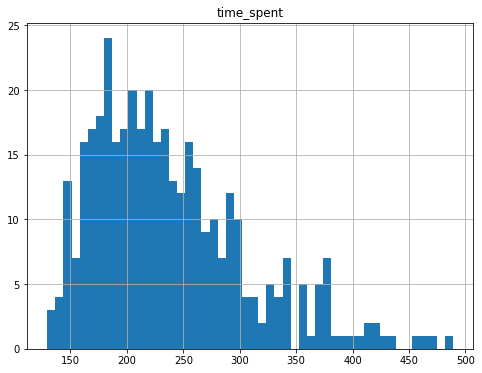

In [47]:
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')

good_stations_stat.hist(bins=50, figsize=(8, 6))

##### №14.4

In [50]:
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
print(good_stat.sort_values('time_spent'))

             time_spent
name                   
Белоцветник       154.0
Бальзамин         158.0
Незабудка         161.0
Колокольчик       161.0
Обриета           167.0
Функия            171.5
Гацания           178.5
Аммобиум          180.5
Пион              180.5
Бархатцы          181.5
Мальва            182.0
Ирис              185.0
Арктотис          185.0
Люпин             186.0
Амарант           187.5
Хризантема        188.0
Тюльпан           190.0
Ромашка           191.0
Бегония           195.0
Вербена           199.0
Гейхера           204.0
Вероника          212.0
Левкой            212.5
Подснежник        218.5
Доротеантус       220.0
Диморфотека       224.0
Немезия           226.0
Гвоздика          229.0
Малопа            229.0
Календула         254.0
Крокус            257.5
Василёк           264.0
Космос            267.0
Георгина          279.0
Лаватера          282.0
Агератум          309.0
Роза              315.0
Петуния           319.5
Гелихризум        342.0
Астильба        

#### Добавляем столбец по данным из другого датафрейма

##### №15.1

In [51]:
station_stat = data.pivot_table(index='id', values='time_spent', aggfunc='median')
stat = data.pivot_table(index='name', values='time_spent')

In [52]:
stat['good_time_spent'] = good_stat['time_spent']
print(stat)

             time_spent  good_time_spent
name                                    
Агератум     337.802721            309.0
Амарант      132.760012            187.5
Аммобиум     256.708042            180.5
Арктотис      73.879984            185.0
Астильба     376.143149            423.0
Бальзамин    134.508411            158.0
Бархатцы     145.300328            181.5
Бегония      163.200647            195.0
Белоцветник  100.818966            154.0
Василёк      268.849897            264.0
Вербена      190.016594            199.0
Вероника     220.019402            212.0
Гацания      160.685185            178.5
Гвоздика     294.317308            229.0
Гейхера      167.445947            204.0
Гелихризум   290.138643            342.0
Георгина     166.615555            279.0
Годеция      113.958333              NaN
Диморфотека  406.161017            224.0
Доротеантус  263.568916            220.0
Ирис         179.931159            185.0
Календула    207.357323            254.0
Колокольчик  119

##### №15.2

In [54]:
id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
print(id_name.head())

                first count
                 name  name
id                         
00ca1b70     Вероника   131
0178ce70      Василёк   164
01abf4e9      Гацания    30
030a9067  Колокольчик   228
03740f2d      Василёк   157


#### Переименование столбцов

##### №16.1

In [55]:
id_name.columns = ['name', 'count']
print(id_name.head())

                 name  count
id                          
00ca1b70     Вероника    131
0178ce70      Василёк    164
01abf4e9      Гацания     30
030a9067  Колокольчик    228
03740f2d      Василёк    157


#### Объединение столбцов методами merge() и join()

##### №17.1

In [58]:
station_stat_full = id_name.merge(good_stations_stat, on='id')
print(station_stat_full.head())

                 name  count  time_spent
id                                      
00ca1b70     Вероника    131       166.0
0178ce70      Василёк    164       234.5
01abf4e9      Гацания     30       181.5
030a9067  Колокольчик    228       135.5
03740f2d      Василёк    157       289.0


In [59]:
station_stat_full = id_name.join(good_stations_stat, how='inner')
print(station_stat_full.head())

                 name  count  time_spent
id                                      
00ca1b70     Вероника    131       166.0
0178ce70      Василёк    164       234.5
01abf4e9      Гацания     30       181.5
030a9067  Колокольчик    228       135.5
03740f2d      Василёк    157       289.0


##### №17.2

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

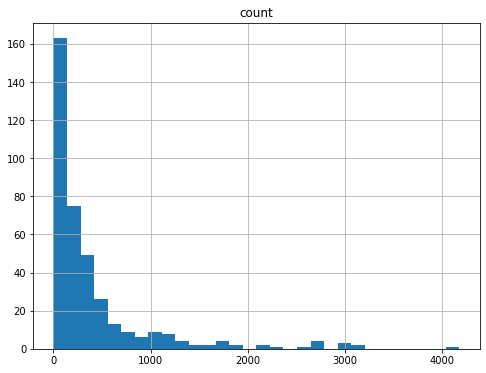

In [64]:
station_stat_full.hist('count', bins=30, figsize=(8, 6))

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

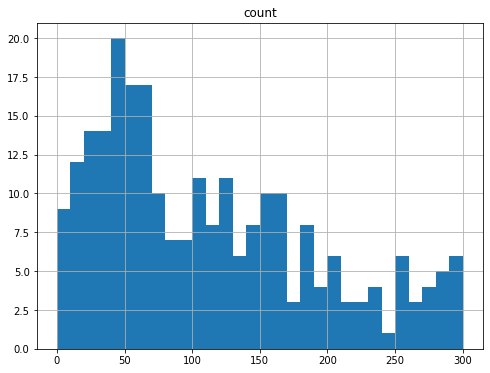

In [65]:
station_stat_full.hist('count', bins=30, range=(0, 300), figsize=(8, 6))

##### №17.3

In [71]:
good_stat2 = station_stat_full.query('count > 30').pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
good_stat2.columns = ['median_time', 'stations']
print(good_stat2.head())

          median_time  stations
name                           
Агератум       308.50         3
Амарант        169.00         5
Аммобиум       178.75         4
Арктотис       190.50         3
Астильба       435.50         4


##### №17.4

In [74]:
final_stat = stat.join(good_stat2, how='inner')
print(final_stat.head())

          time_spent  good_time_spent  median_time  stations
name                                                        
Агератум  337.802721            309.0       308.50         3
Амарант   132.760012            187.5       169.00         5
Аммобиум  256.708042            180.5       178.75         4
Арктотис   73.879984            185.0       190.50         3
Астильба  376.143149            423.0       435.50         4


### Взаимосвязь данных

#### Диаграмма рассеяния

##### №18.1

<AxesSubplot:xlabel='count', ylabel='time_spent'>

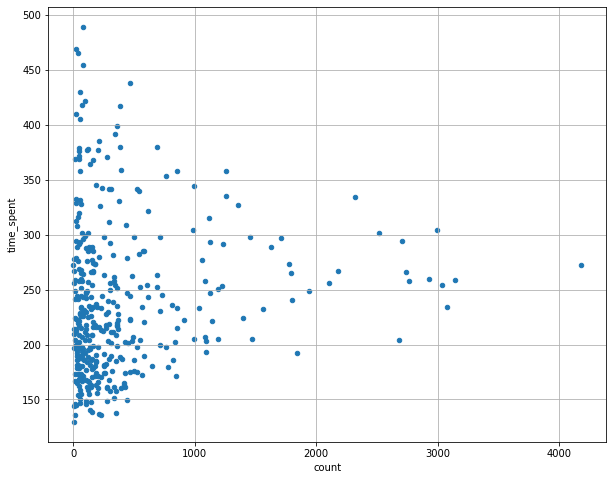

In [76]:
station_stat_full.plot(x='count', y='time_spent', kind='scatter', grid=True, figsize=(10, 8))

#### Корреляция

<AxesSubplot:xlabel='count', ylabel='time_spent'>

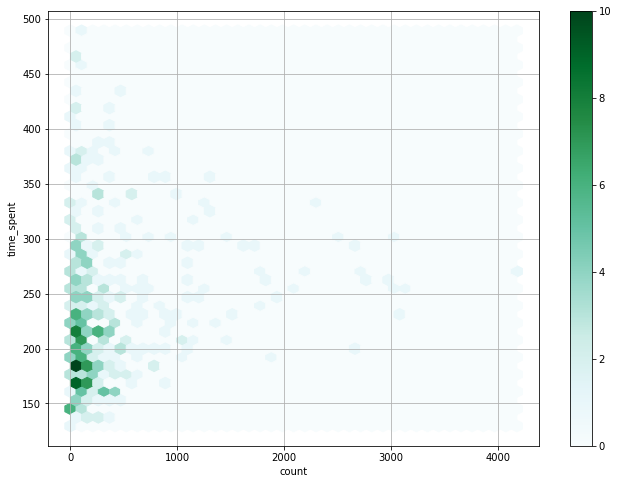

In [85]:
station_stat_full.plot(x='count', y='time_spent', kind='hexbin', gridsize=40, figsize=(11, 8), sharex=False, grid=True) 

##### №19.1

In [86]:
print(station_stat_full['count'].corr(station_stat_full['time_spent']))

0.12242632473597156


#### Матрица диаграмм рассеяния

##### №20.1

In [101]:
station_stat_multi = data.pivot_table(index='id', values=['time_spent', 'too_fast', 'too_slow'], aggfunc='mean')

In [102]:
print(station_stat_multi.corr())

            time_spent  too_fast  too_slow
time_spent    1.000000 -0.640658  0.802247
too_fast     -0.640658  1.000000 -0.255876
too_slow      0.802247 -0.255876  1.000000


array([[<AxesSubplot:xlabel='time_spent', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_fast', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_slow', ylabel='time_spent'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_fast'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_slow'>]], dtype=object)

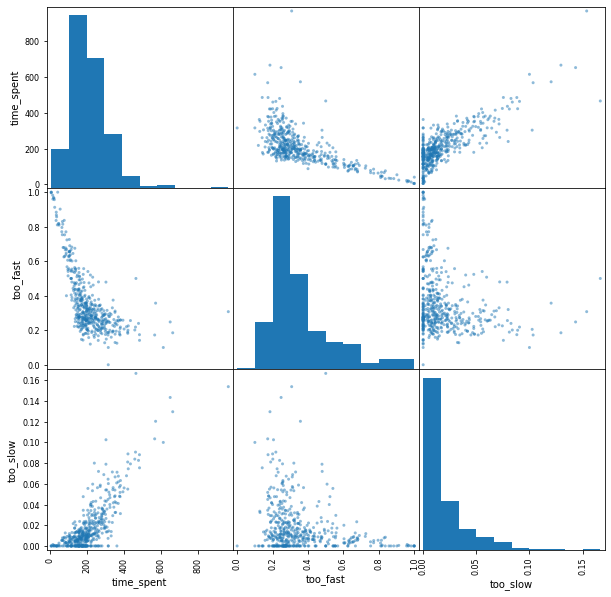

In [103]:
pd.plotting.scatter_matrix(station_stat_multi, figsize=(10, 10))

#### Как выжать максимум из очевидности

##### №21.1

                 time_spent  too_fast  too_slow  good_time_spent
time_spent         1.000000 -0.640658  0.802247         0.702429
too_fast          -0.640658  1.000000 -0.255876        -0.315120
too_slow           0.802247 -0.255876  1.000000         0.445926
good_time_spent    0.702429 -0.315120  0.445926         1.000000 



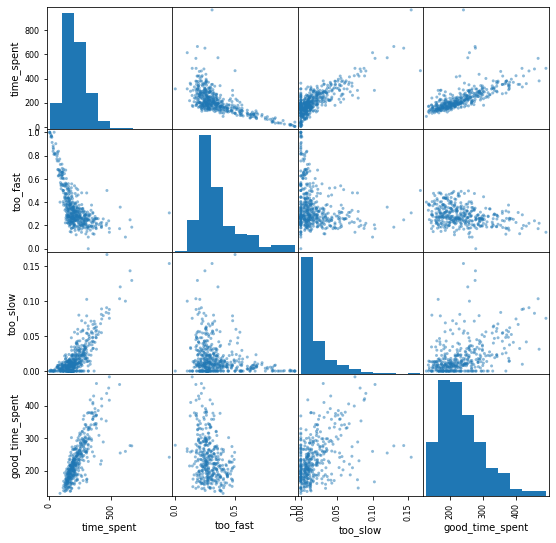

In [113]:
station_stat_multi['good_time_spent'] = good_stations_stat['time_spent']
print(station_stat_multi.corr(), '\n')
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9, 9))
plt.show()

### Валидация результатов

#### Укрупняем группы

##### №22.1

<AxesSubplot:xlabel='name'>

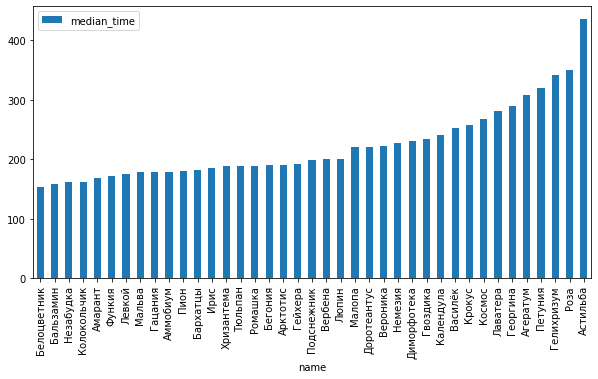

In [116]:
final_stat.sort_values('median_time').plot(y='median_time', kind='bar', figsize=(10, 5))

##### №22.2

<AxesSubplot:xlabel='name'>

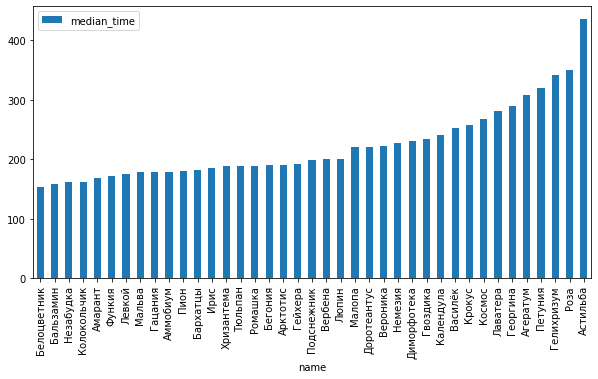

In [117]:
# в join() я использовал значение параметра how='inner', поэтому в моем датафрейме final_stat уже нет строк с NA

final_stat.dropna(subset='median_time').sort_values('median_time').plot(y='median_time', kind='bar', figsize=(10, 5))

##### №22.3

<AxesSubplot:ylabel='Frequency'>

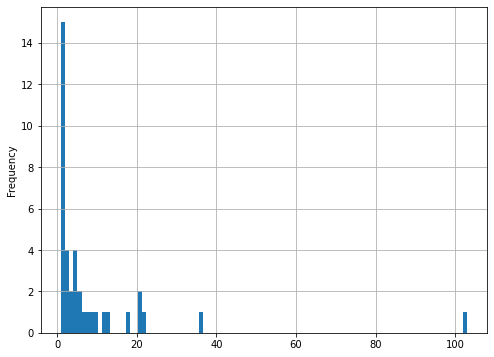

In [131]:
final_stat['stations'].plot(kind='hist', bins=100, grid=True, figsize=(8, 6))

##### №22.4

In [132]:
big_nets_stat = final_stat.query('stations > 10')
print(big_nets_stat)

             time_spent  good_time_spent  median_time  stations
name                                                           
Василёк      268.849897            264.0       252.00       103
Гейхера      167.445947            204.0       192.00        12
Календула    207.357323            254.0       240.00        36
Колокольчик  119.131564            161.0       161.00        21
Люпин        235.440937            186.0       200.00        13
Мальва       136.562234            182.0       177.75        22
Немезия      186.535207            226.0       227.50        21
Роза         260.877217            315.0       350.00        18


##### №22.5

In [142]:
station_stat_full['group_name'] = station_stat_full['name'].where(station_stat_full['name'].isin(big_nets_stat.index), 'Другие')
print(station_stat_full.head())

                 name  count  time_spent   group_name
id                                                   
00ca1b70     Вероника    131       166.0       Другие
0178ce70      Василёк    164       234.5      Василёк
01abf4e9      Гацания     30       181.5       Другие
030a9067  Колокольчик    228       135.5  Колокольчик
03740f2d      Василёк    157       289.0      Василёк


##### №22.6

In [147]:
stat_grouped = station_stat_full.query('count > 30') \
                                .pivot_table(index='group_name', values='time_spent', aggfunc=['median', 'count'])
stat_grouped.columns = ['time_spent', 'count']
stat_grouped.sort_values('time_spent', inplace=True)
print(stat_grouped)

             time_spent  count
group_name                    
Колокольчик      161.00     21
Мальва           177.75     22
Гейхера          192.00     12
Люпин            200.00     13
Другие           208.75    104
Немезия          227.50     21
Календула        240.00     36
Василёк          252.00    103
Роза             350.00     18


##### №22.7

<AxesSubplot:ylabel='count'>

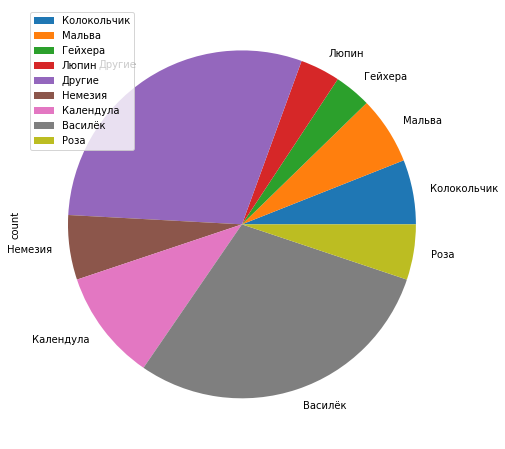

In [148]:
stat_grouped.plot(y='count', kind='pie', figsize=(8, 8))

#### Разбитые по группам данные

##### №23.1

In [150]:
good_data['group_name'] = good_data['name'].where(good_data['name'].isin(big_nets_stat.index), 'Другие')
print(good_data.head())

            date_time        id  time_spent     name          local_time  \
0 2018-04-06 16:53:58  76144fb2        98.0  Василёк 2018-04-06 19:53:58   
2 2018-04-03 17:28:24  76144fb2       220.0  Василёк 2018-04-03 20:28:24   
6 2018-04-02 08:23:21  76144fb2       555.0  Василёк 2018-04-02 11:23:21   
7 2018-04-07 00:34:08  76144fb2       286.0  Василёк 2018-04-07 03:34:08   
9 2018-04-05 13:19:39  76144fb2       248.0  Василёк 2018-04-05 16:19:39   

            date_hour  too_fast  too_slow group_name  
0 2018-04-06 20:00:00     False     False    Василёк  
2 2018-04-03 20:00:00     False     False    Василёк  
6 2018-04-02 11:00:00     False     False    Василёк  
7 2018-04-07 04:00:00     False     False    Василёк  
9 2018-04-05 16:00:00     False     False    Василёк  


##### №23.2

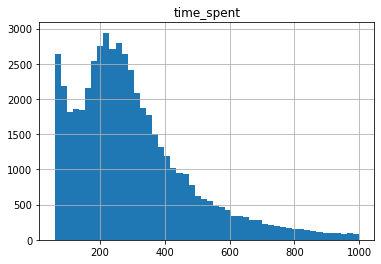

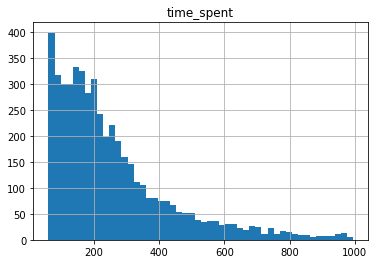

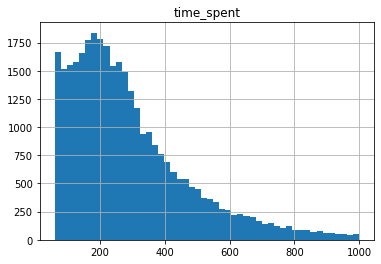

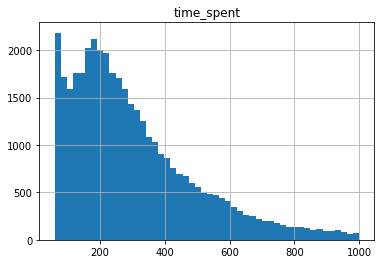

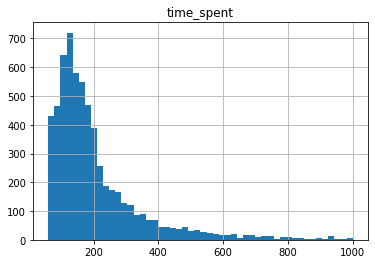

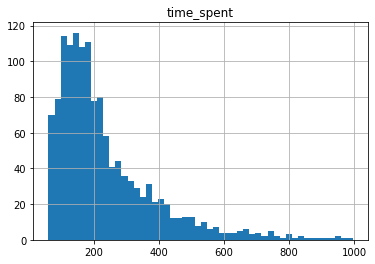

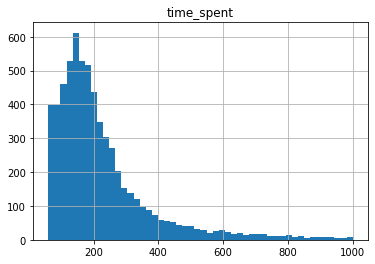

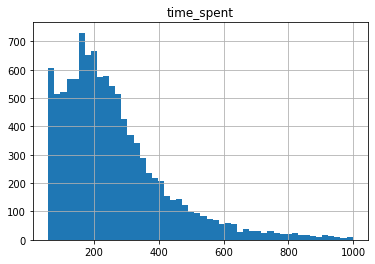

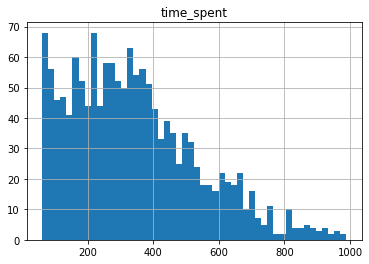

In [151]:
for name, group_data in good_data.groupby('group_name'):
    group_data.hist('time_spent', bins=50)
    plt.show()

##### №23.3

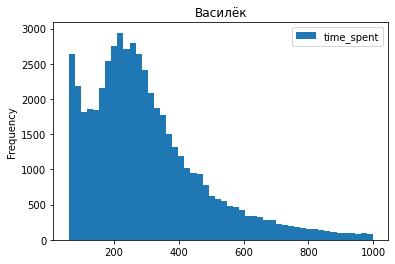

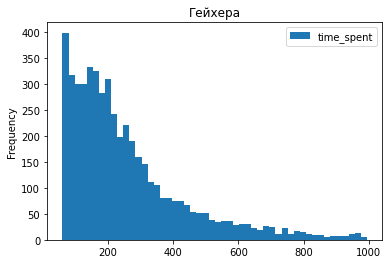

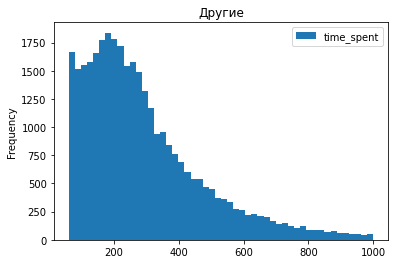

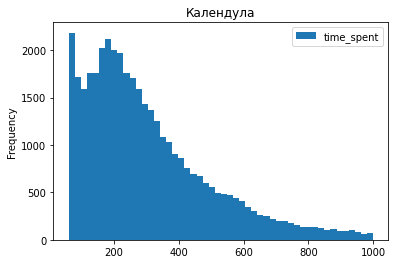

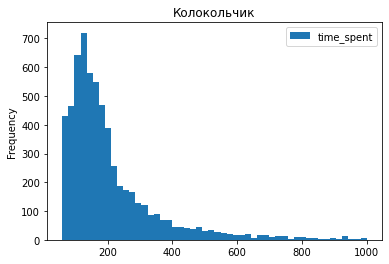

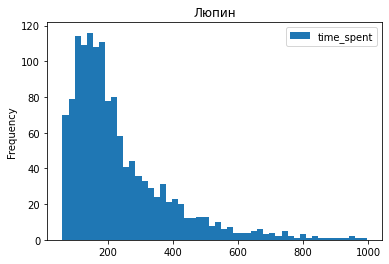

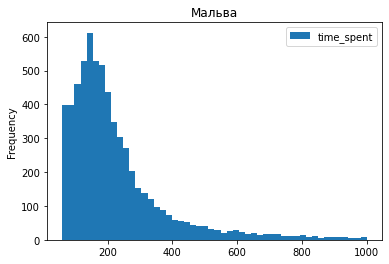

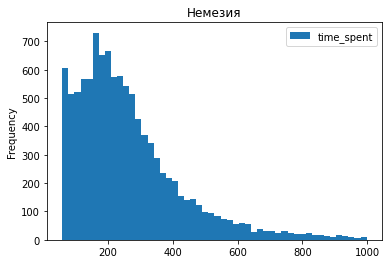

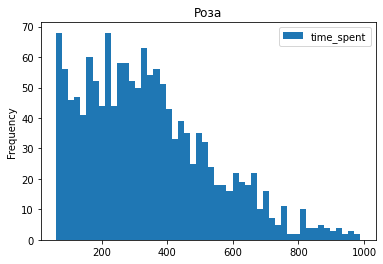

In [159]:
for name, group_data in good_data.groupby('group_name'):
    group_data.plot(y='time_spent', kind='hist', bins=50, title=name)
    plt.show()